## Demo of `RA_NLP.py`

In [1]:
from RA_NLP import NLP_Trainer

In [2]:
import pickle

In [3]:
with open("df (1).pkl", 'rb') as F:
    df = pickle.load(F)
    
df.shape

(10, 7)

In [5]:
df.entities[0] = '[[22, 28, "DOOM"]]'

/home/oceanbao/miniconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
df

,flashcard_id,doc_title,doc_body,date,classifiers,entities,label
0,10,None,I am so worried about Brexit,2019-09-25 08:43:49,"[{""clf_id"": 1, ""selected"": {""Neutral"": 1, ""Neg...","[[22, 28, ""DOOM""]]","{'cats': {'Funny': 0, 'Other': 1, 'Creepy': 0}}"
1,9,None,I would love to have a hot dog before going to...,2019-09-25 08:43:43,"[{""clf_id"": 1, ""selected"": {""Neutral"": 0, ""Neg...","[[23, 26, ""EVENT""], [27, 30, ""EVENT""]]","{'cats': {'Funny': 1, 'Other': 0, 'Creepy': 0}}"
2,3,None,This is the first time taking Lyft. I have to ...,2019-09-22 20:37:14,"[{""clf_id"": 1, ""selected"": {""Neutral"": 1, ""Neg...","[[12, 17, ""ORDINAL""], [30, 34, ""ORG""]]","{'cats': {'Funny': 1, 'Other': 0, 'Creepy': 0}}"
3,6,None,I decided to take Lyft to go to a restaurant i...,2019-09-22 20:37:00,"[{""clf_id"": 1, ""selected"": {""Neutral"": 0, ""Neg...","[[18, 22, ""ORG""], [48, 57, ""GPE""]]","{'cats': {'Funny': 0, 'Other': 0, 'Creepy': 0}}"
4,7,None,This driver is so considerate! He helped me op...,2019-09-22 19:35:43,"[{""clf_id"": 1, ""selected"": {""Neutral"": 0, ""Neg...",[],"{'cats': {'Funny': 0, 'Other': 0, 'Creepy': 0}}"
5,8,None,This guy was so funny and had a great sense of...,2019-09-22 19:35:39,"[{""clf_id"": 1, ""selected"": {""Neutral"": 0, ""Neg...","[[38, 43, ""PERSON""]]","{'cats': {'Funny': 1, 'Other': 0, 'Creepy': 0}}"
6,5,None,Cubans are always the best! They are so friend...,2019-09-22 14:25:19,"[{""clf_id"": 1, ""selected"": {""Neutral"": 0, ""Neg...","[[0, 6, ""NORP""]]","{'cats': {'Funny': 1, 'Other': 0, 'Creepy': 0}}"
7,4,None,Worst driver ever!,2019-09-22 14:25:15,"[{""clf_id"": 1, ""selected"": {""Neutral"": 0, ""Neg...",[],"{'cats': {'Funny': 1, 'Other': 0, 'Creepy': 0}}"
8,2,None,I asked the driver if he could turn on the air...,2019-09-22 14:25:07,"[{""clf_id"": 1, ""selected"": {""Neutral"": 0, ""Neg...","[[106, 110, ""ORG""]]","{'cats': {'Funny': 1, 'Other': 0, 'Creepy': 0}}"
9,1,None,This driver is really creepy. He was taking me...,2019-09-22 14:25:01,"[{""clf_id"": 1, ""selected"": {""Neutral"": 0, ""Neg...","[[22, 28, ""PERCENT""], [104, 106, ""PERCENT""]]","{'cats': {'Funny': 0, 'Other': 0, 'Creepy': 1}}"


### To convert the string of expression inside DF from DB into original Python object

In [7]:
from ast import literal_eval as LE

## entities == string while label == Dict

In [8]:
TRAIN_DATA = [
    NLP_Trainer.converter(row.doc_body, 
              LE(row.entities), 
              row.label)
    for row in list(df.itertuples())
]

In [9]:
TRAIN_DATA[0]

('I am so worried about Brexit',
 {'entities': [(22, 28, 'DOOM')],
  'cats': {'Funny': 0, 'Other': 1, 'Creepy': 0}})

In [2]:
import spacy

In [3]:
en_large = spacy.load('eng_large')

/home/oceanbao/miniconda3/envs/dev/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 176 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
en_large

## Using Kaggle

In [5]:
import pandas as pd
df = pd.read_csv('/home/oceanbao/HACKING/MISC/BACKUP/kaggle_train_clean.csv')

import copy

df.dropna(inplace=True)
df.sentences.notna().value_counts()
df['label'] = df['sentiment'].apply(lambda x: {'cats': {'POS': 1, 'NEG': 0}} if x == 1 else {'cats': {'POS': 0, 'NEG': 1}} )
df['input'] = df.apply(lambda x: (x['sentences'], x['label']), axis=1)

df = df.sample(frac=1)
df.head()

,sentences,sentiment,id,label,input
7837,directorial debut music video show off higuchi...,0,7837,"{'cats': {'POS': 0, 'NEG': 1}}",(directorial debut music video show off higuch...
7553,neat little story believing swamped heavy hand...,0,7553,"{'cats': {'POS': 0, 'NEG': 1}}",(neat little story believing swamped heavy han...
1294,kind attentive concern hoffman brings characte...,1,1294,"{'cats': {'POS': 1, 'NEG': 0}}",(kind attentive concern hoffman brings charact...
5280,filmmakers know eye prettiest pictures tell be...,0,5280,"{'cats': {'POS': 0, 'NEG': 1}}",(filmmakers know eye prettiest pictures tell b...
5153,draws decent laughs low cal woody best,0,5153,"{'cats': {'POS': 0, 'NEG': 1}}","(draws decent laughs low cal woody best, {'cat..."


## `NLP_Trainer` has default not multilabel (non-exclusive)

In [6]:
trainer = NLP_Trainer(
    df.input.values[:2000],
    model=en_large, 
    pipelines=['textcat'], 
    train_ratio=0.8,
    epoch=10,
    multilabel=False,
    )

In [12]:
# trainer = NLP_Trainer(
#     TRAIN_DATA,
#     model=en_large, 
#     pipelines=['textcat', 'ner'], 
#     train_ratio=0.8,
#     epoch=10,
#     multilabel=False,
#     )

## Main methods/data under class

1. First call `.prep_data()`
2. Then train `.start_train()`

In [7]:
trainer.prep_data()

Using 2000 examples (1600 training, 400 evaluation)


In [8]:
trainer.textcat.labels

('NEG', 'POS')

In [9]:
trainer.start_train()

Training TextCat model...
=== Running epoch: 1 of 10 ===
Finish epoch with elapsed time: 20.498968362808228
>>> TextCat Loss : 416.10545225068927
=== Running epoch: 2 of 10 ===
Finish epoch with elapsed time: 29.772125720977783
>>> TextCat Loss : 407.54056717455387
=== Running epoch: 3 of 10 ===
Finish epoch with elapsed time: 38.32855010032654
>>> TextCat Loss : 414.44762884881993
=== Running epoch: 4 of 10 ===
Finish epoch with elapsed time: 38.0252799987793
>>> TextCat Loss : 342.2217726911616
=== Running epoch: 5 of 10 ===
Finish epoch with elapsed time: 37.377896308898926
>>> TextCat Loss : 197.96264577729315
=== Running epoch: 6 of 10 ===
Finish epoch with elapsed time: 36.45556163787842
>>> TextCat Loss : 87.50730255251243
=== Running epoch: 7 of 10 ===
Finish epoch with elapsed time: 36.49740266799927
>>> TextCat Loss : 69.86024663745513
=== Running epoch: 8 of 10 ===
Finish epoch with elapsed time: 36.4478554725647
>>> TextCat Loss : 37.65640189094903
=== Running epoch: 9 of 1

### `.nlp` object is exposed

In [10]:
trainer.nlp.pipe_names

['tagger', 'parser', 'ner', 'textcat']

In [11]:
trainer.nlp.get_pipe('ner').move_names[-5:]

['U-ORDINAL', 'U-PRODUCT', 'U-LAW', 'U-LANGUAGE', 'O']

In [12]:
trainer.nlp.get_pipe('textcat').labels

('NEG', 'POS')

### Save to disk method

In [13]:
trainer.to_disk('DELE_MOD', 'Demo_Model')

Saved model to DELE_MOD


In [14]:
!tree DELE_MOD -sh

DELE_MOD
├── [ 808]  meta.json
├── [4.0K]  ner
│   ├── [ 329]  cfg
│   ├── [4.0M]  model
│   └── [1.0K]  moves
├── [4.0K]  parser
│   ├── [ 330]  cfg
│   ├── [4.2M]  model
│   └── [1.6K]  moves
├── [4.0K]  tagger
│   ├── [ 137]  cfg
│   ├── [3.8M]  model
│   └── [1.1K]  tag_map
├── [4.0K]  textcat
│   ├── [ 130]  cfg
│   └── [5.4M]  model
├── [ 77K]  tokenizer
└── [4.0K]  vocab
    ├── [9.0M]  key2row
    ├── [123M]  lexemes.bin
    ├── [ 22M]  strings.json
    └── [784M]  vectors

5 directories, 17 files


In [23]:
# !rm -rf DELE_MOD/

### dataframe containing epoch-metrics

In [16]:
trainer.eval_info

,train_accu,dev_accu,train_fscore,dev_fscore,train_bal_accu,dev_bal_accu
0,0.553125,0.5450,0.385211,0.368056,0.555912,0.538336
1,0.735625,0.5700,0.720792,0.514124,0.736230,0.567480
2,0.767500,0.5850,0.768944,0.585000,0.767514,0.585366
3,0.875625,0.6050,0.873490,0.601010,0.875881,0.605128
4,0.945000,0.6350,0.944862,0.623711,0.945120,0.634647
5,0.974375,0.6125,0.974455,0.609572,0.974441,0.612695
6,0.991250,0.6275,0.991326,0.632099,0.991262,0.628205
7,0.995625,0.6150,0.995666,0.609137,0.995631,0.615009
8,0.997500,0.6175,0.997525,0.614610,0.997500,0.617699
9,0.998125,0.6175,0.998145,0.612658,0.998119,0.617573


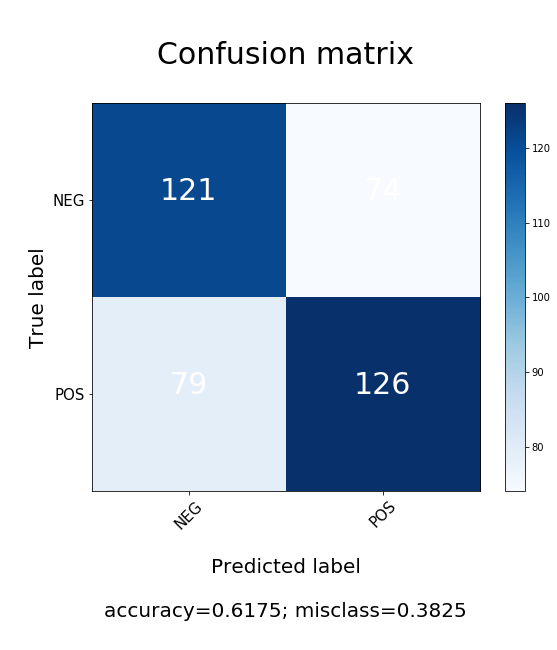

In [17]:
trainer.plot_confusion()

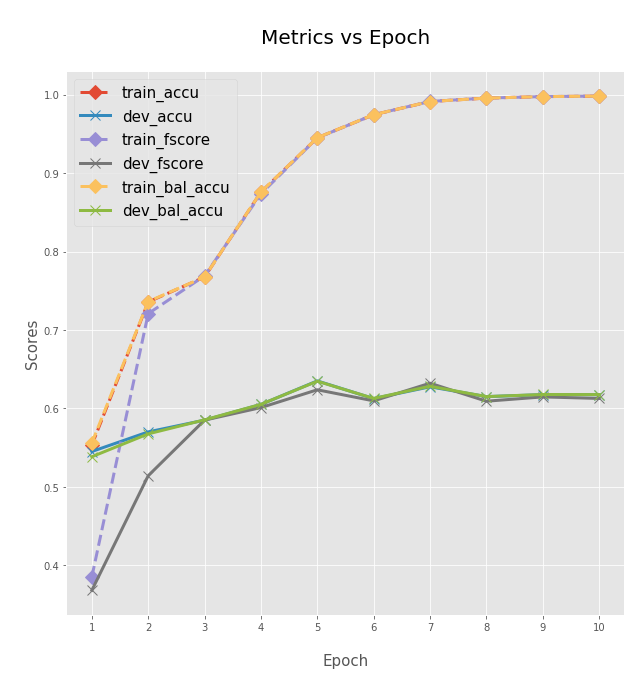

In [18]:
trainer.plot_score()

In [19]:
print(trainer.class_report)

              precision    recall  f1-score   support

         NEG       0.60      0.62      0.61       195
         POS       0.63      0.61      0.62       205

    accuracy                           0.62       400
   macro avg       0.62      0.62      0.62       400
weighted avg       0.62      0.62      0.62       400



## Test NE

In [13]:
test_nlp = spacy.load('DELE_MOD')

In [14]:
test_nlp.get_pipe('ner').move_names[-5:]

['O', 'B-DOOM', 'I-DOOM', 'L-DOOM', 'U-DOOM']

In [58]:
test_data = [x[0] for x in TRAIN_DATA]

## Prediction Score Distribution (regardless of train or new dataset)

1. some bug on the y-axis TODO

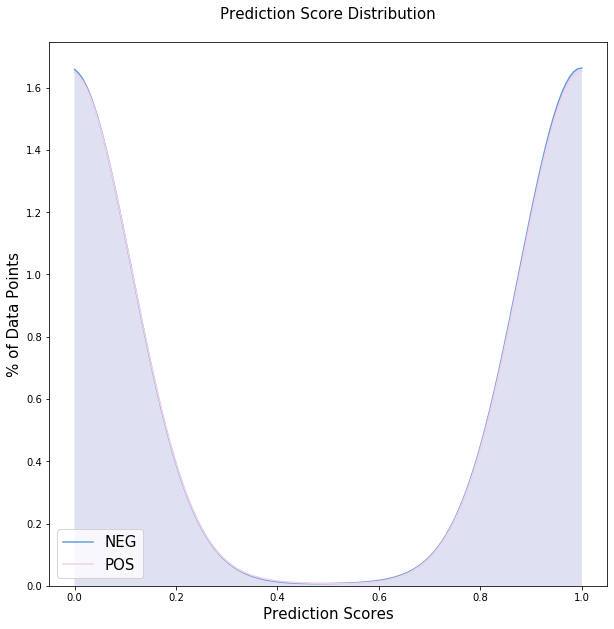

In [20]:
NLP_Trainer.plot_predict_distribution(nlp=trainer.nlp, text=trainer.train_texts, save_png=None)

## Get Top Loss Data

1. currently only available for `type='train'`, new data prediction requires some math calcu TODO
2. as method is static (available from class NLP_Trainer without init instance), need to prep input data such as `docs` (pass through nlp and clean label iterable `annos`
3. Train data has True labels, hence able to use losses to sort worst prediction

In [21]:
# testing on train-data

docs_train = list(trainer.nlp.pipe((x for x in trainer.train_texts)))

In [22]:
NLP_Trainer.get_top_loss(nlp=trainer.nlp, docs=docs_train, annos=trainer.train_labels, type='train')

,text,loss,true,pred
1336,entertaining new,4.338858e-01,"{'POS': 0, 'NEG': 1}","{'NEG': 0.06845736503601074, 'POS': 0.93154257..."
322,bad movie near good original,2.968656e-01,"{'POS': 1, 'NEG': 0}","{'NEG': 0.7705395817756653, 'POS': 0.229460373..."
63,story unrequited love doesn sustain half hour,2.473763e-01,"{'POS': 0, 'NEG': 1}","{'NEG': 0.29661351442337036, 'POS': 0.70338648..."
536,kept wishing watching documentary wartime nava...,8.615337e-02,"{'POS': 0, 'NEG': 1}","{'NEG': 0.5849015116691589, 'POS': 0.415098458..."
658,narc remind brilliant crime dramas,8.231591e-02,"{'POS': 0, 'NEG': 1}","{'NEG': 0.5942515134811401, 'POS': 0.405748486..."
...,...,...,...,...
1074,flick cool crowd pleasing documentary,1.563014e-11,"{'POS': 1, 'NEG': 0}","{'NEG': 5.579317985393573e-06, 'POS': 0.999994..."
1440,lejos del paraíso mismo tiempo una fiesta para...,1.504334e-11,"{'POS': 1, 'NEG': 0}","{'NEG': 5.486636382556753e-06, 'POS': 0.999994..."
1482,stanley kwan directed best gay love stories be...,1.129288e-11,"{'POS': 1, 'NEG': 0}","{'NEG': 4.73646878162981e-06, 'POS': 0.9999952..."
1218,bold lyrical feature raja amari expands pat no...,8.752128e-12,"{'POS': 1, 'NEG': 0}","{'NEG': 4.195261226414004e-06, 'POS': 0.999995..."
